<a href="https://colab.research.google.com/github/laresamdeola/Computer-Vision/blob/main/Medical_Imaging_with_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
from pathlib import Path
import matplotlib.pyplot as plt

In [2]:
!pip install pydicom

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 24.2 MB/s eta 0:00:00


In [3]:
import pydicom

In [4]:
dicom_file = pydicom.read_file('ID_0089_AGE_0071_CONTRAST_0_CT.dcm')

In [5]:
print(dicom_file)

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 196
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: CT Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.3.6.1.4.1.14519.5.2.1.6450.4012.104854528449942157741569987930
(0002, 0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.40.0.13.1.1.1
(0002, 0013) Implementation Version Name         SH: 'dcm4che-1.4.34'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'AXIAL']
(0008, 0012) Instance Creation Date              DA: '19901015'
(0008, 0013) Instance Creation Time              TM: '122248'
(0008, 0016) SOP Class UID                       UI: CT Image Storage
(0008, 0018) SOP Insta

In [6]:
dicom_file[0x0028, 0x0010]

(0028, 0010) Rows                                US: 512

In [7]:
dicom_file.Rows

512

In [8]:
ct = dicom_file.pixel_array

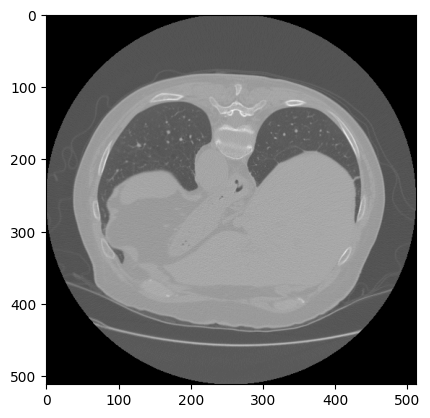

In [13]:
plt.figure()
plt.imshow(ct, cmap='gray')

In [14]:
path_to_head_mri = Path("/content/MRI-Scans/")

In [15]:
all_files = list(path_to_head_mri.glob('*'))

In [16]:
all_files

[PosixPath('/content/MRI-Scans/ID_0057_AGE_0049_CONTRAST_0_CT.dcm'),
 PosixPath('/content/MRI-Scans/ID_0015_AGE_0061_CONTRAST_1_CT.dcm'),
 PosixPath('/content/MRI-Scans/ID_0006_AGE_0075_CONTRAST_1_CT.dcm'),
 PosixPath('/content/MRI-Scans/ID_0046_AGE_0072_CONTRAST_1_CT.dcm'),
 PosixPath('/content/MRI-Scans/ID_0056_AGE_0083_CONTRAST_0_CT.dcm'),
 PosixPath('/content/MRI-Scans/ID_0099_AGE_0061_CONTRAST_0_CT.dcm'),
 PosixPath('/content/MRI-Scans/ID_0071_AGE_0065_CONTRAST_0_CT.dcm'),
 PosixPath('/content/MRI-Scans/ID_0070_AGE_0074_CONTRAST_0_CT.dcm'),
 PosixPath('/content/MRI-Scans/ID_0019_AGE_0070_CONTRAST_1_CT.dcm'),
 PosixPath('/content/MRI-Scans/ID_0087_AGE_0044_CONTRAST_0_CT.dcm'),
 PosixPath('/content/MRI-Scans/ID_0078_AGE_0066_CONTRAST_0_CT.dcm'),
 PosixPath('/content/MRI-Scans/ID_0017_AGE_0060_CONTRAST_1_CT.dcm'),
 PosixPath('/content/MRI-Scans/ID_0000_AGE_0060_CONTRAST_1_CT.dcm'),
 PosixPath('/content/MRI-Scans/ID_0084_AGE_0067_CONTRAST_0_CT.dcm'),
 PosixPath('/content/MRI-Scans/ID_

In [17]:
mri_data = []

for path in all_files:
  data = pydicom.read_file(path)
  mri_data.append(data)

In [18]:
for slice in mri_data[:5]:
  print(slice.SliceLocation)

249
-155
-260
-474
-76.5000000000


In [20]:
mri_data_ordered = sorted(mri_data, key=lambda slice: slice.SliceLocation)

for slice in mri_data_ordered[:10]:
  print(slice.SliceLocation)

-1168.4
-948.5
-948.2
-918.5
-901
-874
-874
-816.5
-795.030
-763.5


In [21]:
full_volume = []

for slice in mri_data_ordered:
  full_volume.append(slice.pixel_array)

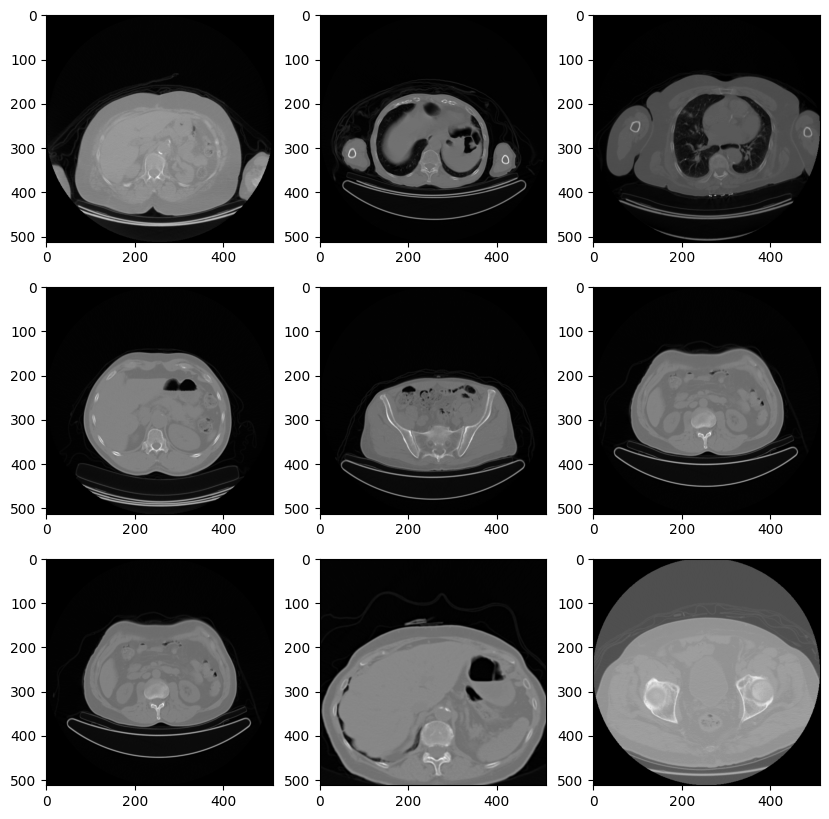

In [22]:
fig, axis = plt.subplots(3, 3, figsize=(10, 10))

slice_counter = 0

for i in range(3):
  for j in range(3):
    axis[i][j].imshow(full_volume[slice_counter], cmap='gray')
    slice_counter += 1

Using SimpleITK

In [24]:
!pip install SimpleITK

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.4/52.4 MB 16.4 MB/s eta 0:00:00


In [25]:
import SimpleITK as sitk

In [26]:
series_ids = sitk.ImageSeriesReader.GetGDCMSeriesIDs(str(path_to_head_mri))

In [44]:
print(series_ids)

('1.3.6.1.4.1.14519.5.2.1.3023.4012.102289758600639081883682341599', '1.3.6.1.4.1.14519.5.2.1.3023.4012.111970507245102440072981773069', '1.3.6.1.4.1.14519.5.2.1.3023.4012.154470741269083988898569715734', '1.3.6.1.4.1.14519.5.2.1.3023.4012.251486101984782457779149100338', '1.3.6.1.4.1.14519.5.2.1.3023.4012.281222452204153314922270968637', '1.3.6.1.4.1.14519.5.2.1.3023.4012.297267439816180432188742253053', '1.3.6.1.4.1.14519.5.2.1.3023.4012.513523794062613324810980652054', '1.3.6.1.4.1.14519.5.2.1.3023.4012.648531603410109839170055154074', '1.3.6.1.4.1.14519.5.2.1.3023.4012.695837418985624676340861607694', '1.3.6.1.4.1.14519.5.2.1.6450.4012.153444090734536905415278769671', '1.3.6.1.4.1.14519.5.2.1.6450.4012.175016803370372621275285549100', '1.3.6.1.4.1.14519.5.2.1.6450.4012.185965196167856618864777448062', '1.3.6.1.4.1.14519.5.2.1.6450.4012.200234714530375524999580843628', '1.3.6.1.4.1.14519.5.2.1.6450.4012.249320450296411760831322037482', '1.3.6.1.4.1.14519.5.2.1.6450.4012.288687105792

In [48]:
all_series_ids = []

for i in range(0, len(series_ids)):
  series_file_names = sitk.ImageSeriesReader.GetGDCMSeriesFileNames(str(path_to_head_mri), series_ids[i])
  all_series_ids += series_file_names

In [49]:
all_series_ids

['/content/MRI-Scans/ID_0078_AGE_0066_CONTRAST_0_CT.dcm',
 '/content/MRI-Scans/ID_0025_AGE_0074_CONTRAST_1_CT.dcm',
 '/content/MRI-Scans/ID_0008_AGE_0051_CONTRAST_1_CT.dcm',
 '/content/MRI-Scans/ID_0031_AGE_0039_CONTRAST_1_CT.dcm',
 '/content/MRI-Scans/ID_0082_AGE_0047_CONTRAST_0_CT.dcm',
 '/content/MRI-Scans/ID_0030_AGE_0076_CONTRAST_1_CT.dcm',
 '/content/MRI-Scans/ID_0053_AGE_0073_CONTRAST_0_CT.dcm',
 '/content/MRI-Scans/ID_0002_AGE_0074_CONTRAST_1_CT.dcm',
 '/content/MRI-Scans/ID_0073_AGE_0074_CONTRAST_0_CT.dcm',
 '/content/MRI-Scans/ID_0035_AGE_0059_CONTRAST_1_CT.dcm',
 '/content/MRI-Scans/ID_0092_AGE_0072_CONTRAST_0_CT.dcm',
 '/content/MRI-Scans/ID_0089_AGE_0071_CONTRAST_0_CT.dcm',
 '/content/MRI-Scans/ID_0075_AGE_0080_CONTRAST_0_CT.dcm',
 '/content/MRI-Scans/ID_0060_AGE_0080_CONTRAST_0_CT.dcm',
 '/content/MRI-Scans/ID_0022_AGE_0074_CONTRAST_1_CT.dcm',
 '/content/MRI-Scans/ID_0091_AGE_0072_CONTRAST_0_CT.dcm',
 '/content/MRI-Scans/ID_0062_AGE_0067_CONTRAST_0_CT.dcm',
 '/content/MRI

In [47]:
series_file_names

('/content/MRI-Scans/ID_0043_AGE_0069_CONTRAST_1_CT.dcm',)

In [50]:
series_reader = sitk.ImageSeriesReader()
series_reader.SetFileNames(all_series_ids)

In [51]:
image_data = series_reader.Execute()

In [52]:
head_mri = sitk.GetArrayFromImage(image_data)

In [53]:
head_mri.shape

(100, 512, 512)

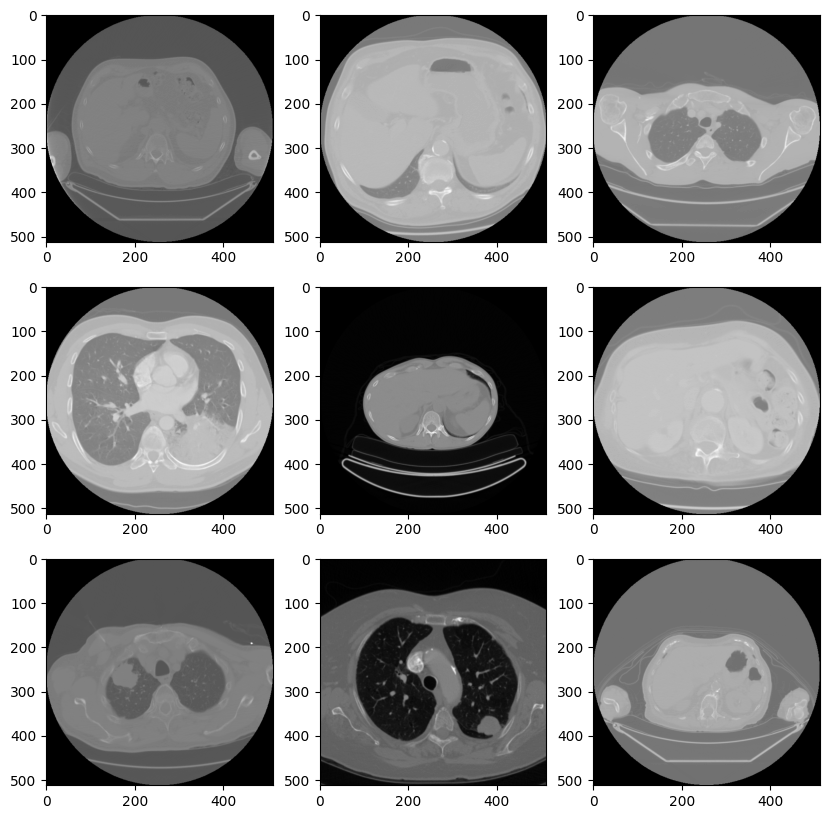

In [54]:
fig, axis = plt.subplots(3, 3, figsize=(10, 10))

slice_counter = 0

for i in range(3):
  for j in range(3):
    axis[i][j].imshow(head_mri[slice_counter], cmap='gray')
    slice_counter += 1